In [1]:
"""
This jupyter notebook includes code taken from the following nilearn project, 
"8.3.10. Voxel-Based Morphometry on Oasis dataset", which predicts age from
grey matter morhpometry. Feature redux = k-best ANOVA, prediction function = SVM. 

I am tweaking the code to the following analysis: 
Include train_test_split
Feature redux = PCA, prediction function = SVM. 
I've included various plots.
I'm having some trouble using the pipeline function for PCA and SVM. 

Right now, using train_test. 
Will implement k-fold validation
"""

'\nThis jupyter notebook includes code taken from the following nilearn project, \n"8.3.10. Voxel-Based Morphometry on Oasis dataset", which predicts age from\ngrey matter morhpometry. Feature redux = k-best ANOVA, prediction function = SVM. \n\nI am tweaking the code to the following analysis: \nInclude train_test_split\nFeature redux = PCA, prediction function = SVM. \nI\'ve included various plots.\nI\'m having some trouble using the pipeline function for PCA and SVM. \n\nRight now, use train_test. \nWill implement k-fold validation\n'

In [2]:
# Let's keep our notebook clean, so it's a little more readable!
import warnings
warnings.filterwarnings('ignore')

In [3]:
from nilearn import datasets
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from nilearn.input_data import NiftiMasker
#import sklearn

In [4]:
from nilearn import plotting

In [8]:
oasis_dataset = datasets.fetch_oasis_vbm() #Selected all 403 subjects
gray_matter_map_filenames = oasis_dataset.gray_matter_maps
age = oasis_dataset.ext_vars['age'].astype(float)

C:\Users\rwick\Anaconda3\lib\site-packages\numpy\lib\npyio.py:2315: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [ ]:
'''
#for later if I decide to look at white matter
#Note to self: make sure the nifti masker is adapted for white matter, with correct fwhm
white_matter_map_filenames = oasis_dataset.white_matter_maps
wm_maps_masked = nifti_masker.fit_transform(white_matter_map_filenames)
'''

In [10]:
nifti_masker = NiftiMasker(
    standardize=False,
    smoothing_fwhm=2,
    memory='nilearn_cache')  # cache options
gm_maps_masked = nifti_masker.fit_transform(gray_matter_map_filenames)

n_samples, n_features = gm_maps_masked.shape
print("%d samples, %d features" % (n_samples, n_features))

403 samples, 902629 features


In [16]:
gm_maps_masked
#np.range(gm_maps_masked)
#def range(x, axis=0):
    #return np.max(x, axis=axis) - np.min(x, axis=axis)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.6498417e-06, 4.4375727e-05, 3.6675119e-05, ..., 1.7444372e-04,
        1.9291109e-04, 1.7344361e-04]], dtype=float32)

In [18]:
np.amax(gm_maps_masked)
#Max and min, and tissue values aren't make sense if they're supposed to represent probability.

3.8437061

In [21]:
np.amin(gm_maps_masked)

0.0

In [19]:
subject1 = oasis_dataset.gray_matter_maps[0]
plotting.view_img(subject1)

In [ ]:
#Now, running a PCA instead of the K-best method

PCA + SVR


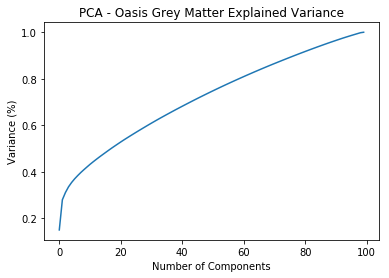

'\nWe have our predictor (SVR), our feature selection (PCA), and now,\nwe can plug them together in a *pipeline* that performs the two operations\nsuccessively:\n'

In [58]:
print("PCA + SVR")

from sklearn.model_selection import train_test_split
GMtrain, GMtest, age_train, age_test = train_test_split(gm_maps_masked, age, random_state=1)

# Define the prediction function to be used.
# Here we use a Support Vector Classification, with a linear kernel
from sklearn.svm import SVR
svr = SVR(kernel='linear')

# Dimension reduction

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scaler.tranform(GMtrain)
#scaler.tranform(GMtest)
#doesn't work
pca = PCA(n_components=100)
GMtrain_compressed = pca.fit_transform(GMtrain) # Fit the data for the training set 
GMtest_compressed = pca.fit_transform(GMtest) # Fit the data for the test set

#Does fit_transform take care of scaling? 
#Exact difference between fit and fit_transform?

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('PCA - Oasis Grey Matter Explained Variance')
plt.show()

In [55]:
gm_maps_masked.shape

(403, 902629)

In [56]:
GMtrain_compressed.shape

(302, 100)

In [57]:
GMtest_compressed.shape

(101, 100)

In [ ]:
print(pca.components_)

In [ ]:
len(pca.explained_variance_ratio_)

In [ ]:
shortened_components=pca.explained_variance_ratio_[:20]

In [ ]:
shortened_components

In [ ]:
mylist = []
for i in range(20): 
    mylist.append("PCA%i" % i)
mylist

In [ ]:
#Creating a plot showing variance explained by first 20 components. 
plt.figure(figsize=(15,5))
df = pd.DataFrame({'var':shortened_components,
             'PC':mylist})
sns.barplot(x='PC',y="var", 
           data=df, color="c")

In [ ]:
#When I tried running a lineplot, my components got all out of order. 

In [61]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps = [('PCA', pca), ('svr', svr)]                                                   
### Fit and predict
pipe.fit(GMtrain, age_train)
age_pred_reb = pipe.predict(GMtest)
#find ordinary least squares between predicted and true age
#loop thru (age - age_pred_reb)^2

SyntaxError: invalid syntax (<ipython-input-61-c068312b858b>, line 6)

In [62]:
type(gm_maps_masked)
type(age)
type(GMtrain)
type(GMtest)

numpy.ndarray

In [63]:
print(gm_maps_masked.shape)
print(GMtrain.shape)
print(GMtest.shape)
print(age.shape)
print(age_train.shape)
print(age_test.shape)

(403, 902629)
(302, 902629)
(101, 902629)
(403,)
(302,)
(101,)


In [64]:
# Measure accuracy with cross validation
from sklearn.model_selection import cross_val_score
#Check how to do cross-validation scores with train test split
cv_scores = cross_val_score(pipe, GMTest, age_test)

# Return the corresponding mean prediction accuracy
prediction_accuracy = np.mean(cv_scores)
print("=== SVM ===")
print("Prediction accuracy: %f" % prediction_accuracy)
print("")


NameError: name 'pipe' is not defined

In [ ]:
#Random: Scree plot: a line plot of the eigenvalues of factors or principal components in an analysis

In [24]:
print("ANOVA + SVR")
# Define the prediction function to be used.
# Here we use a Support Vector Classification, with a linear kernel
from sklearn.svm import SVR
svr = SVR(kernel='linear')

# Dimension reduction
from sklearn.feature_selection import VarianceThreshold, SelectKBest, \
        f_regression

# Remove features with too low between-subject variance
variance_threshold = VarianceThreshold(threshold=.01)

# Here we use a classical univariate feature selection based on F-test,
# namely Anova.
feature_selection = SelectKBest(f_regression, k=2000)

# We have our predictor (SVR), our feature selection (SelectKBest), and now,
# we can plug them together in a *pipeline* that performs the two operations
# successively:
from sklearn.pipeline import Pipeline
anova_svr = Pipeline([
            ('variance_threshold', variance_threshold),
            ('anova', feature_selection),
            ('svr', svr)])

### Fit and predict
anova_svr.fit(gm_maps_masked, age)
age_pred = anova_svr.predict(gm_maps_masked)

ANOVA + SVR


In [ ]:
coef = svr.coef_
# reverse feature selection
coef = feature_selection.inverse_transform(coef)
# reverse variance threshold
coef = variance_threshold.inverse_transform(coef)
# reverse masking
weight_img = nifti_masker.inverse_transform(coef)

# Create the figure
from nilearn.plotting import plot_stat_map, show
bg_filename = gray_matter_map_filenames[0]
z_slice = 0


fig = plt.figure(figsize=(5.5, 7.5), facecolor='k')
# Hard setting vmax to highlight weights more
display = plot_stat_map(weight_img, bg_img=bg_filename,
                        display_mode='z', cut_coords=[z_slice],
                        figure=fig, vmax=1)
display.title('SVM weights', y=1.2)

# Measure accuracy with cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(anova_svr, gm_maps_masked, age)

# Return the corresponding mean prediction accuracy
prediction_accuracy = np.mean(cv_scores)
print("=== ANOVA ===")
print("Prediction accuracy: %f" % prediction_accuracy)
print("")

In [ ]:
### Inference with massively univariate model #################################
print("Massively univariate model")# Statistical inference
from nilearn.mass_univariate import permuted_ols
data = variance_threshold.fit_transform(gm_maps_masked)
neg_log_pvals, t_scores_original_data, _ = permuted_ols(
    age, data,  # + intercept as a covariate by default
    n_perm=2000,  # 1,000 in the interest of time; 10000 would be better
    n_jobs=1)  # can be changed to use more CPUs
signed_neg_log_pvals = neg_log_pvals * np.sign(t_scores_original_data)
signed_neg_log_pvals_unmasked = nifti_masker.inverse_transform(
    variance_threshold.inverse_transform(signed_neg_log_pvals))

# Show results
threshold = -np.log10(0.1)  # 10% corrected

fig = plt.figure(figsize=(5.5, 7.5), facecolor='k')

display = plot_stat_map(signed_neg_log_pvals_unmasked, bg_img=bg_filename,
                        threshold=threshold, cmap=plt.cm.RdBu_r,
                        display_mode='z', cut_coords=[z_slice],
                        figure=fig)
title = ('Negative $\log_{10}$ p-values'
         '\n(Non-parametric + max-type correction)')
display.title(title, y=1.2)

n_detections = (signed_neg_log_pvals_unmasked.get_data() > threshold).sum()
print('\n%d detections' % n_detections)

show()